<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravishankarkushwaha/credit-card-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 435kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ravishankarkushwaha/credit-card-churn-dataset/versions/1


In [2]:
import shutil
import os

source_path = path
destination_path = '/content/credit-card-churn-dataset'

# Remove destination if it already exists to prevent errors with copytree
if os.path.exists(destination_path):
    shutil.rmtree(destination_path)

# Copy the entire directory
shutil.copytree(source_path, destination_path)

print(f"Dataset moved from '{source_path}' to '{destination_path}'")

Dataset moved from '/root/.cache/kagglehub/datasets/ravishankarkushwaha/credit-card-churn-dataset/versions/1' to '/content/credit-card-churn-dataset'


In [3]:
# List the contents of the new directory to confirm
print("Contents of the new dataset directory:")
print(os.listdir('/content/credit-card-churn-dataset'))

Contents of the new dataset directory:
['Churn_Modelling.csv']


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
df = pd.read_csv('/content/credit-card-churn-dataset/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Exited'].value_counts() #Imbalanced dataset

,count
Exited,
0,7963
1,2037


In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
df_encoded = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype('int')

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Exited', axis=1), df_encoded['Exited'], test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8686 - loss: 0.3220 - val_accuracy: 0.8581 - val_loss: 0.3457
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8702 - loss: 0.3112 - val_accuracy: 0.8581 - val_loss: 0.3417
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8643 - loss: 0.3189 - val_accuracy: 0.8631 - val_loss: 0.3428
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8675 - loss: 0.3118 - val_accuracy: 0.8581 - val_loss: 0.3408
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8649 - loss: 0.3111 - val_accuracy: 0.8612 - val_loss: 0.3396
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8739 - loss: 0.3100 - val_accuracy: 0.8606 - val_loss: 0.3420
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8717 - loss: 0.3073 - val_accuracy: 0.8550 - val_loss: 0.3432
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8685 - loss: 0.3127 - val_accuracy: 0.

In [34]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
y_pred =np.where(y_log > 0.5, 1, 0)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
accuary_score = accuracy_score(y_test, y_pred)

In [38]:
accuary_score

0.8575

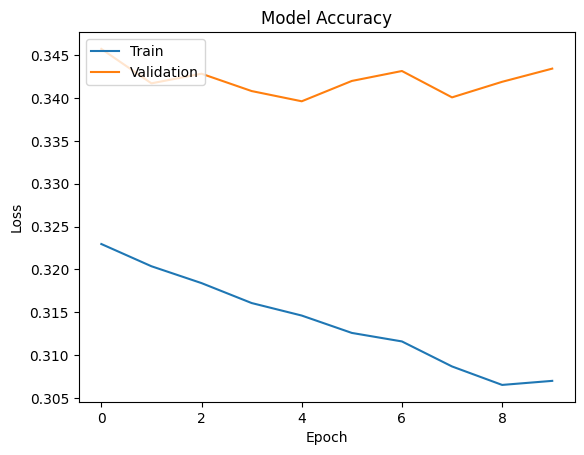

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()